> 구글 드라이브
https://colab.research.google.com/drive/1FpkIcqSV3HU75-fERp597L7hKfHZM7VU


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 평균

In [2]:
X = np.array([45, 26, 57, 67, 40, 30, 55, 60, 95, 500])

# 공식대로 구하기
print(X.sum()/len(X))

# numpy 기능으로 바로 구하기
print(X.mean())

97.5
97.5


In [3]:
# 이상치에 영향을 많이 받음
print(X[:-1].mean())

52.77777777777778


### 중앙값

In [4]:
# 이상치에 영향 별로 없음
np.median(X)

56.0

In [5]:
# 크기 순을 정렬해서 가운데 있는 값
# 데이터 개수가 짝수면 가운데 두값의 평균
X.sort()
X

array([ 26,  30,  40,  45,  55,  57,  60,  67,  95, 500])

### 분산과 표준편차
- score1과 score2는 평균이 똑같음

In [6]:
np.random.seed(0)
scores1 = np.random.randint(30, 100, 10)
print(scores1)
print(scores1.mean())

[74 77 94 97 97 39 51 66 42 88]
72.5


In [7]:
scores2 = np.random.randint(50, 90, 10)
print(scores2)
print(scores2.mean())

[51 88 89 73 74 67 87 75 63 58]
72.5


- 각 데이터에서 평균과의 차이를 구하고 이를 막대그래프로 표현

In [8]:
deviations1 = scores1 - scores1.mean()
deviations1

array([  1.5,   4.5,  21.5,  24.5,  24.5, -33.5, -21.5,  -6.5, -30.5,
        15.5])

In [9]:
deviations2 = scores2 - scores2.mean()
deviations2

array([-21.5,  15.5,  16.5,   0.5,   1.5,  -5.5,  14.5,   2.5,  -9.5,
       -14.5])

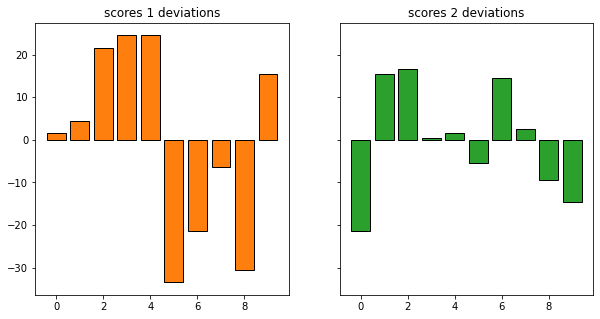

In [10]:
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey=True)

ax[0].bar(np.arange(10), deviations1, color='C1', edgecolor='k')
ax[0].set_title('scores 1 deviations')
ax[1].bar(np.arange(10), deviations2, color='C2', edgecolor='k')
ax[1].set_title('scores 2 deviations')
plt.show()

- 이 평균과의 차이값들을 평균해보면 0이 됨

In [11]:
print(deviations1.sum() / len(deviations1))
print(deviations2.sum() / len(deviations2))

0.0
0.0


- 그래서 제곱하여 평균을 냄

In [12]:
# 편차 제곱의 평균[+]
print((deviations1**2).mean())
print((deviations2**2).mean())

# numpy 기능으로 분산 바로 구하기 [+]
print(scores1.var())
print(scores2.var())

448.25
152.45
448.25
152.45


- 분산은 평균과의 편차값을 한변으로 하는 정사각형들의 평균 넓이

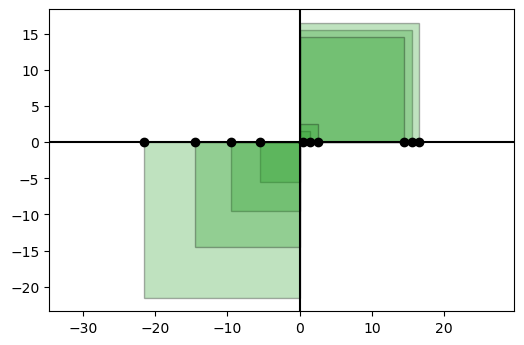

In [13]:
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x, x, edgecolor='k', 
                   facecolor=colors[1], alpha=0.3) 
            for x in deviations2 ]

for cov in covs:
    ax.add_patch(cov)
    
ax.plot(deviations2, np.zeros_like(deviations2), 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')
plt.show()


### 표준편차
- 분산이 제곱되어 구해진 값이므로 제곱근을 구해서 원래 데이터와 비슷한 지표로 만든 값

In [14]:
# # 편차 제곱 평균의 양의 제곱근
print(np.sqrt((deviations1**2).mean()))
print(np.sqrt((deviations2**2).mean()))

# numpy 기능으로 표준편차 바로 구하기 [+]
print(scores1.std())
print(scores2.std())

21.17191535974013
12.34706442843804
21.17191535974013
12.34706442843804


## 히스토그램

In [15]:
np.random.seed(0)
scores = np.abs((np.random.randn(500)*13)-65).astype(int)
scores[scores>=100] = 100

In [16]:
# 히스토그램[+]
hist, bins = np.histogram(scores, bins=10, range=(0,100))
hist

array([  0,   0,   1,  14,  40, 116, 141, 123,  50,  15])

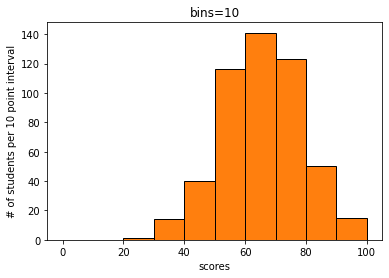

In [17]:
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=10, range=(0,100), color='C1', edgecolor='k')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 10 point interval')
ax.set_title('bins=10')
plt.show()

- 구간을 더 촘촘히 해서 그리면

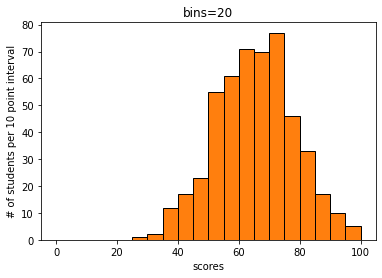

In [18]:
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=20, range=(0,100), color='C1', edgecolor='k')
ax.set_title('bins=20')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 10 point interval')
plt.show()

## 상자그림

In [19]:
D = np.array([1,2,3,4,5,6,7,8,9,10])

# 이 데이터는 이상치 존재
# D = np.array([2,3,4,5,6,7,8,9,10,18,20])

- 전체 데이터에서 25%, 50%, 75%에 위치하는 값을 Q1, Q2, Q3으로 구함

- 이산 데이터를 줄세우고 25% 위치에 해당하는 값을 구할 때 깔끔하게 정수로 떨어지지 않게 되므로 interpolation이란 옵션으로 적당한 값을 선정

In [20]:
Q1 = np.percentile(D, 25, interpolation='nearest')
Q2 = np.percentile(D, 50)
Q3 = np.percentile(D, 75, interpolation='nearest')

print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=3, Q2=5.5, Q3=8


In [21]:
# Q3과 Q1의 차이
IQR = Q3 - Q1
IQR

5

- 식 Q3 + 1.5*IQR 로 가상의 상위 울타리upper fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최대값을 찾음

In [22]:
upper_fence = Q3 + 1.5*IQR
print(upper_fence)

upper_whisker = np.max(D[D<upper_fence])
print(upper_whisker)

15.5
10


- Q1 - 1.5*IQR로 가상의 하위 울타리lower fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최소값을 찾음

In [24]:
lower_fence = Q1 - 1.5*IQR
print(lower_fence) 

upper_whisker = np.min(D[D>lower_fence])
print(upper_whisker)

-4.5
1


- matplotlib에서 상자그림을 그림

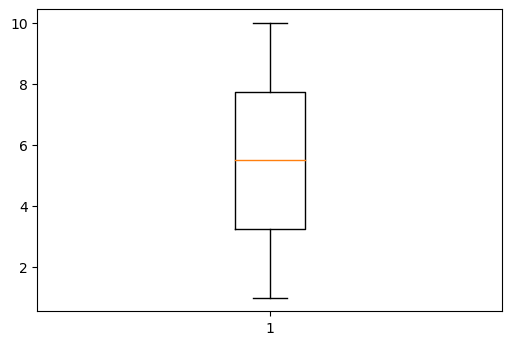

In [25]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ret = ax.boxplot(D)

plt.show()

- 그려진 상자그림에서 계산된 값들이 미리 계산한 값들과 일치하는가?

In [26]:
print("upper whisker", ret['caps'][1].get_xydata()[0,1])
print("Q3", ret['boxes'][0].get_xydata()[2,1])
print("Q2", ret['medians'][0].get_xydata()[0,1])
print("Q1", ret['boxes'][0].get_xydata()[0,1])
print("lower whisker", ret['caps'][0].get_xydata()[0,1])

upper whisker 10.0
Q3 7.75
Q2 5.5
Q1 3.25
lower whisker 1.0


## 2차원 데이터

In [27]:
# 키
H = np.array([170, 155, 175, 182, 171, 188, 165, 167, 175, 183])
# 몸무게
W = np.array([ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98])

# 신체 정보
X = np.array([H, W])
X

array([[170, 155, 175, 182, 171, 188, 165, 167, 175, 183],
       [ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98]])

- 다차원 데이터의 행렬은 항상 (N, D)

In [28]:
X = X.T
X

array([[170,  65],
       [155,  59],
       [175,  68],
       [182,  78],
       [171,  62],
       [188,  85],
       [165,  63],
       [167,  58],
       [175,  70],
       [183,  98]])

## 평균 두 개, 분산 두 개

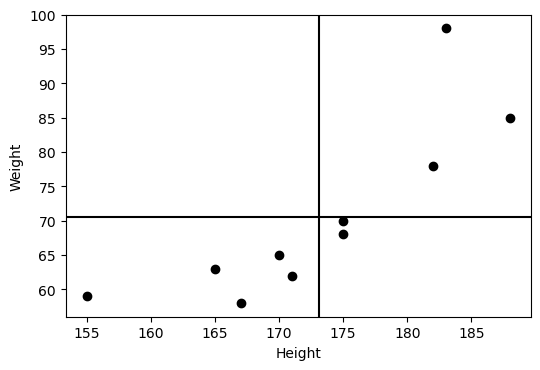

In [29]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='k')

# 두 데이터의 평균선 그림
ax.axhline(y=X[:,1].mean(), color='k')
ax.axvline(x=X[:,0].mean(), color='k')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

- 앞서 알아본 통계값인 평균, 분산은 각 데이터 마다 계산 가능

In [30]:
print("키 평균: ", X[:,0].mean())
print("몸무게 평균: ", X[:,1].mean())

print("키 분산: ", X[:,0].var())
print("몸무게 분산: ", X[:,1].var())

키 평균:  173.1
몸무게 평균:  70.6
키 분산:  85.09
몸무게 분산:  147.64000000000001


## 공분산
- 두 데이터 사이의 관계를 나타내는 분산값을 계산

- 공분산의 의미는 두 데이터의 평균값 두개로 계산되는 각각의 편차를 가로변, 세로변으로 하는 직사각형의 평균 넓이

- 여기서는 음의 평균도 존재

- 아래 그림에서 2사분면, 4사분면에 있는 데이터들이 음의 면적에 해당

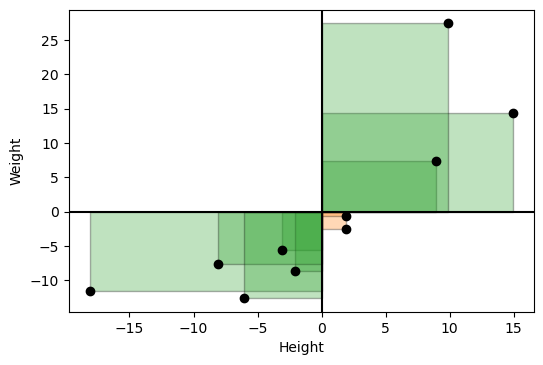

In [31]:
# 공분산의 그림 표현
# :                +------------------+
# :                |                  |
# :              height               |
# :                |                  |
# :               (xy)---- width -----+
# (xy, w, h)
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

X_bar = X.mean(axis=0)
X_tilde = X - X_bar

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x[0], x[1], edgecolor='k', 
                   facecolor=colors[((x[0]*x[1])>0).astype(int)], alpha=0.3) 
            for x in X_tilde ]

for cov in covs:
    ax.add_patch(cov)
ax.plot(X_tilde[:,0], X_tilde[:,1], 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

In [32]:
# 공분산 직접 계산
np.sum(X_tilde[:,0] * X_tilde[:,1]) / (X_tilde.shape[0]-1)

103.26666666666668

In [33]:
# 공분산
np.cov(X[:,0], X[:,1])

array([[ 94.54444444, 103.26666667],
       [103.26666667, 164.04444444]])

## 상관계수

In [34]:
# 위 데이터의 상관계수
np.corrcoef(X.T)

array([[1.      , 0.829204],
       [0.829204, 1.      ]])

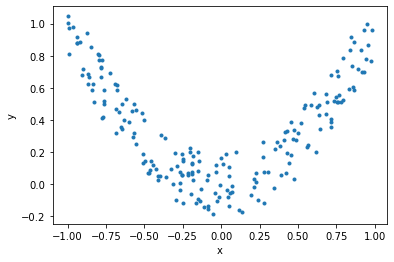

In [35]:
# 직선의 상관성이 없는 데이터

x = np.random.uniform(-1, 1, 200)
X_uncorr = np.array( [x, x**2 + np.random.uniform(-0.2, 0.2, 200)]).T

fig = plt.figure()
ax = plt.axes()

ax.plot(X_uncorr[:,0], X_uncorr[:,1], '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [36]:
print(np.corrcoef(X_uncorr.T))

[[ 1.         -0.02566704]
 [-0.02566704  1.        ]]


## 순열과 조합

In [37]:
import itertools

### 순열

In [38]:
list(itertools.permutations('ABCD', 2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'A'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C')]

In [39]:
# ABCDEFG -> XCDEFG
len(list(itertools.permutations('XCDEFG', 6)))

720

### 조합

In [40]:
list(itertools.combinations('ABCD', 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [41]:
list(
    itertools.product(
        itertools.combinations('12345', 3),
        itertools.combinations('1234567', 3)
    )
    
)

[(('1', '2', '3'), ('1', '2', '3')),
 (('1', '2', '3'), ('1', '2', '4')),
 (('1', '2', '3'), ('1', '2', '5')),
 (('1', '2', '3'), ('1', '2', '6')),
 (('1', '2', '3'), ('1', '2', '7')),
 (('1', '2', '3'), ('1', '3', '4')),
 (('1', '2', '3'), ('1', '3', '5')),
 (('1', '2', '3'), ('1', '3', '6')),
 (('1', '2', '3'), ('1', '3', '7')),
 (('1', '2', '3'), ('1', '4', '5')),
 (('1', '2', '3'), ('1', '4', '6')),
 (('1', '2', '3'), ('1', '4', '7')),
 (('1', '2', '3'), ('1', '5', '6')),
 (('1', '2', '3'), ('1', '5', '7')),
 (('1', '2', '3'), ('1', '6', '7')),
 (('1', '2', '3'), ('2', '3', '4')),
 (('1', '2', '3'), ('2', '3', '5')),
 (('1', '2', '3'), ('2', '3', '6')),
 (('1', '2', '3'), ('2', '3', '7')),
 (('1', '2', '3'), ('2', '4', '5')),
 (('1', '2', '3'), ('2', '4', '6')),
 (('1', '2', '3'), ('2', '4', '7')),
 (('1', '2', '3'), ('2', '5', '6')),
 (('1', '2', '3'), ('2', '5', '7')),
 (('1', '2', '3'), ('2', '6', '7')),
 (('1', '2', '3'), ('3', '4', '5')),
 (('1', '2', '3'), ('3', '4', '6')),
 

## 이산 확률 분포

In [42]:
from scipy.stats import bernoulli, multinomial

## 베르누이 분포
- scipy의 기능을 이용해 모수 mu를 지정하여 확률변수 정의

P(X=1)=0.25,         P(X=0)=0.75


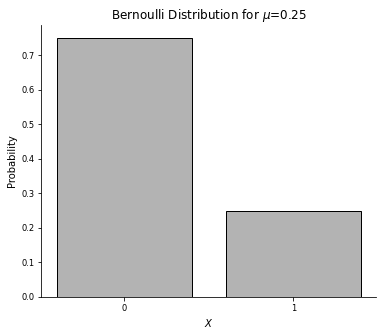

In [43]:
mu = 0.25

# 확률변수 정의
bern_rv = bernoulli(mu)

# 확률질량함수
print(f"P(X=1)={bern_rv.pmf(1)}, \
        P(X=0)={bern_rv.pmf(0)}")

fig = plt.figure(figsize=(6,5))
ax = plt.axes()

xticks = [0, 1]

ax.bar([0, 1], [bern_rv.pmf(0), bern_rv.pmf(1)], color='0.7', edgecolor='k')
ax.set_xticks(xticks)
ax.set_xlabel(r"$X$")
ax.set_ylabel("Probability")
ax.set_title(r"Bernoulli Distribution for $\mu$=0.25")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

### 베르누이 분포 시뮬레이션
- 정의된 확률변수로 부터 데이터를 샘플링하여 이론적인 분포와 비슷하게 샘플들이 분포하는지 확인

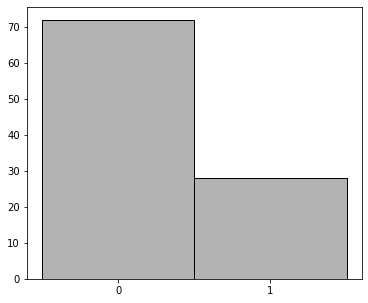

In [44]:
# 랜덤 샘플링
samples = bern_rv.rvs(size=100)

fig = plt.figure(figsize=(6,5))
ax = plt.axes()

ax.hist(samples, bins=range(3), density=False, color='0.7', edgecolor='k')

xticks = np.arange(2)+0.5
ax.set_xticks(xticks)
ax.set_xticklabels(['0', '1'])

plt.show()

### 멀티누이 분포

P(X=[1. 0. 0. 0. 0. 0.])=0.047619
P(X=[0. 1. 0. 0. 0. 0.])=0.095238
P(X=[0. 0. 1. 0. 0. 0.])=0.142857
P(X=[0. 0. 0. 1. 0. 0.])=0.190476
P(X=[0. 0. 0. 0. 1. 0.])=0.238095
P(X=[0. 0. 0. 0. 0. 1.])=0.285714


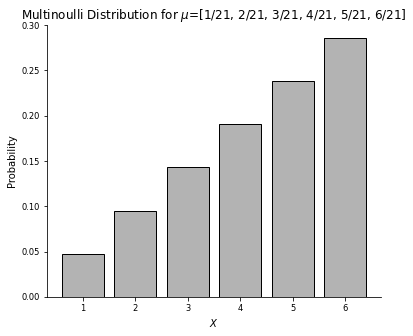

In [45]:
K = 6
mu = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

# 확률변수 정의
cat_rv = multinomial(n=1, p=mu)

# 원핫인코딩된 변수
X = np.zeros((6,6))
X[np.arange(K), np.arange(K)] = 1

# 확률질량함수
for x in X:
    print(f"P(X={x})={cat_rv.pmf(x):.6f}")

fig = plt.figure(figsize=(6,5))
ax = plt.axes()

xticks = np.arange(6)

ax.bar(xticks+1, cat_rv.pmf(X), color='0.7', edgecolor='k')
ax.set_xticks(xticks+1)
ax.set_xlabel(r"$X$")
ax.set_ylabel("Probability")
ax.set_title(r"Multinoulli Distribution for $\mu$=[1/21, 2/21, 3/21, 4/21, 5/21, 6/21]")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

### 멀티누이 분포 시뮬레이션

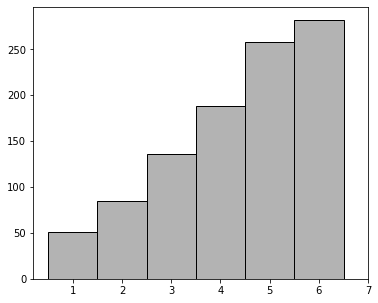

In [46]:
# 시뮬레이션

# 랜덤 샘플링 (1000, 6)
samples = cat_rv.rvs(size=1000).argmax(axis=1)

fig = plt.figure(figsize=(6,5))
ax = plt.axes()

ax.hist(samples, bins=range(K+1), density=False, color='0.7', edgecolor='k')

xticks = np.arange(K+1)+0.5
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(K+1)+1)

plt.show()

## 결합확률분포

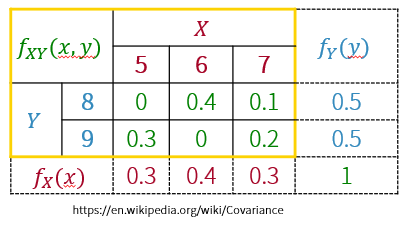

- 확률변수 X, Y가 결합된 확률 변수를 XY라고 하면

- 위 그림처럼 분포하는 결합 확률분포에 대해서 결합확률질량함수를 아래처럼 코딩

In [47]:
def f_XY(x, y):
    if x in [5,6,7] and y in [8,9]:
        p = 0.0

        if (x,y) == (5,8):
            p = 0
        if (x,y) == (5,9):
            p = 0.3
        if (x,y) == (6,8):
            p = 0.4
        if (x,y) == (6,9):
            p = 0
        if (x,y) == (7,8):
            p = 0.1
        if (x,y) == (7,9):
            p = 0.2

        return p
    else:
        return 0

- 확률변수 X와 Y가 가질 수 있는 값들을 정의


In [48]:
x_supp = np.array([5,6,7])
y_supp = np.array([8,9])

### 분포로부터 기댓값, 분산, 공분산
- X, Y의 가능한 값과 그 값에 대한 확률을 모두 알고 있으므로 이론적으로 기댓값, 분산, 공분산을 구할 수 있음

In [49]:
# X, Y에 대한 기댓값을 각각 구함
mean_X = 0.0
for x in x_supp:
    for y in y_supp:
        mean_X += np.array([x])*f_XY(x, y)
print("E[X]=",mean_X)

mean_Y = 0.0
for x in x_supp:
    for y in y_supp:
        mean_Y += np.array([y])*f_XY(x, y)
print("E[Y]=",mean_Y)

E[X]= [6.]
E[Y]= [8.5]


In [50]:
# 변수 XY에 대한 기댓값을 바로 구함

mean_XY = np.array([0., 0.])
for x in x_supp:
    for y in y_supp:
        mean_XY += np.array([x, y])*f_XY(x, y)
print("E[XY]=",mean_XY)

E[XY]= [6.  8.5]


- 비슷하게 각 변수의 분산과 공분산을 이론적으로 구함

In [51]:
var_X = 0.0
for x in x_supp:
    for y in y_supp:
        var_X += (np.array([x]) - mean_X)**2 * f_XY(x, y)
print("Var[X]=",var_X)

var_Y = 0.0
for x in x_supp:
    for y in y_supp:
        var_Y += (np.array([y]) - mean_Y)**2 * f_XY(x, y)
print("Var[Y]=",var_Y)

Var[X]= [0.6]
Var[Y]= [0.25]


In [52]:
cov_XY = 0.0
for x in x_supp:
    for y in y_supp:
        cov_XY += np.prod(np.array([x, y]) - mean_XY) * f_XY(x, y)
print("Cov[X,Y]=",cov_XY)

Cov[X,Y]= -0.1


### 샘플로 부터 기댓값, 분산, 공분산
- 위 이론적으로 구한값과 분포로부터 샘플링한 샘플을 이용해서 구한 값들이 일치하는지 확인

- 아래 함수 draw()는 샘플링 함수

In [53]:
def draw(XY, n):
    x_supp, y_supp, f_XY = XY
    dist = [(sample, f_XY(*sample)) 
                for sample in itertools.product(x_supp, y_supp)]

    samples_i = np.random.choice(len(dist), size=n, p=[x[1] for x in dist])
    samples = np.array([dist[x][0] for x in samples_i])
    
    return samples

In [54]:
# 10000개 샘플링
samples = draw((x_supp, y_supp, f_XY), 10000)

In [55]:
# 샘플된 각 샘플들의 개수가 분포와 비슷한지 확인
np.unique(samples, axis=0, return_counts=True)

(array([[5, 9],
        [6, 8],
        [7, 8],
        [7, 9]]),
 array([3076, 3975,  981, 1968]))

In [56]:
# 샘플들의 평균
print("m=")
np.mean(samples, axis=0)

m=


array([5.9873, 8.5044])

In [57]:
# 샘플들의 분산, 공분산
print("s=")
np.cov(samples.T)

s=


array([[ 0.60239895, -0.10440456],
       [-0.10440456,  0.25000564]])

- 10000개 샘플중에 유일한 값은 네개밖에 없기 때문에 아래 그림에서 검은점으로 나타내었음

- 검은점과 평균값의 차이를 각 변으로 하는 사각형의 넓이를 그림으로 나타냄
 
- 공분산은 그림에 나타는 면적에  𝑓𝑋𝑌(𝑥,𝑦) 값을 곱해서 다 더한 것이므로 그림의 면적에 높이값으로  𝑓𝑋𝑌(𝑥,𝑦) 값을 곱한 부피의 합

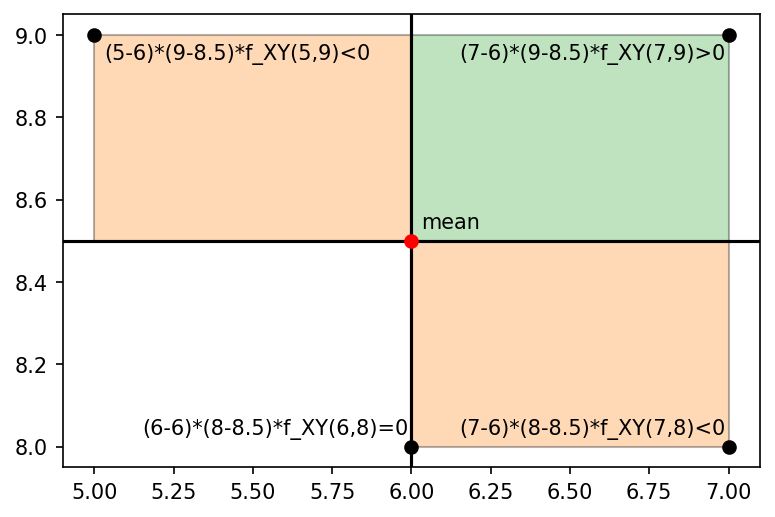

In [59]:
samples_uniq = np.unique(samples, axis=0)
deviations_uniq = np.unique(samples, axis=0) - mean_XY

fig = plt.figure(dpi=150)
ax = plt.axes()

covs = [ Rectangle( (mean_X, mean_Y), x[0], x[1], edgecolor='k', 
                   facecolor=colors[((x[0]*x[1]) > 0).astype(int)], alpha=0.3) 
            for x in deviations_uniq ]

for cov in covs:
    ax.add_patch(cov)

ax.plot(samples_uniq[:,0], samples_uniq[:,1], 'o', color='k')
ax.axhline(y=mean_Y, color='k')
ax.axvline(x=mean_X, color='k')
ax.plot(mean_X, mean_Y, 'o', color='r')
ax.text(mean_X+0.03, mean_Y+0.03, 'mean')
ax.text(5+0.03, 9-0.06, '(5-6)*(9-8.5)*f_XY(5,9)<0')
ax.text(7-0.85, 9-0.06, '(7-6)*(9-8.5)*f_XY(7,9)>0')
ax.text(6-0.85, 8+0.03, '(6-6)*(8-8.5)*f_XY(6,8)=0')
ax.text(7-0.85, 8+0.03, '(7-6)*(8-8.5)*f_XY(7,8)<0')

plt.show()